In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [74]:
df = pd.read_csv('weather_data.csv')
df.head(20)


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,Rain,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,Rain,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,Rain,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,Rain,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,Rain,30.467914,1022.793931


In [75]:
df.shape


(311, 7)

In [76]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [77]:

features = df.drop('date', axis=1)
df.columns

Index(['date', 'avg_temperature', 'humidity', 'avg_wind_speed', 'rain_or_not',
       'cloud_cover', 'pressure'],
      dtype='object')

In [78]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
avg_temperature,296.0,25.983840,6.802475,15.000000,20.265692,27.177958,32.204599,35.000000
humidity,296.0,55.041385,19.220133,30.000000,34.280826,56.759806,72.189837,90.000000
avg_wind_speed,296.0,7.556636,5.344683,0.069480,3.550354,7.326421,11.050627,56.636041
cloud_cover,296.0,49.834827,29.009459,0.321826,24.530951,50.725120,76.046506,99.834751
pressure,311.0,1001.059119,28.835595,951.240404,975.757545,1001.938586,1026.578884,1049.543752


In [79]:
df.isnull().sum()


date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

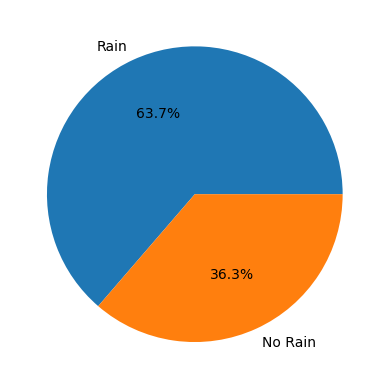

In [80]:
plt.pie(df['rain_or_not'].value_counts().values,
        labels = df['rain_or_not'].value_counts().index,
        autopct='%1.1f%%')
plt.show()


In [81]:
df.replace({'Rain':1, 'No Rain':0}, inplace=True)


In [82]:
df.drop(['date'],axis =1, inplace = True)
df.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,23.639303,57.826186,12.248992,1,38.062329,1030.264331


In [83]:
df.groupby('rain_or_not').mean()


,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
rain_or_not,,,,,
0,23.252155,46.617437,6.641547,51.182497,997.627100
1,27.530349,59.810498,8.074702,49.071861,1003.017796


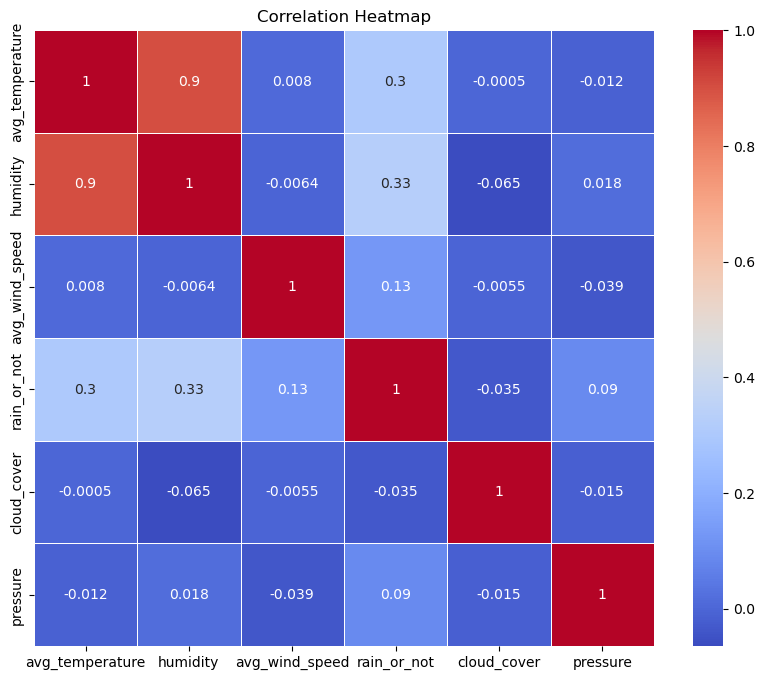

In [84]:
# Check for non-numeric columns
df.dtypes

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
plt.figure(figsize=(10, 8))
sb.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


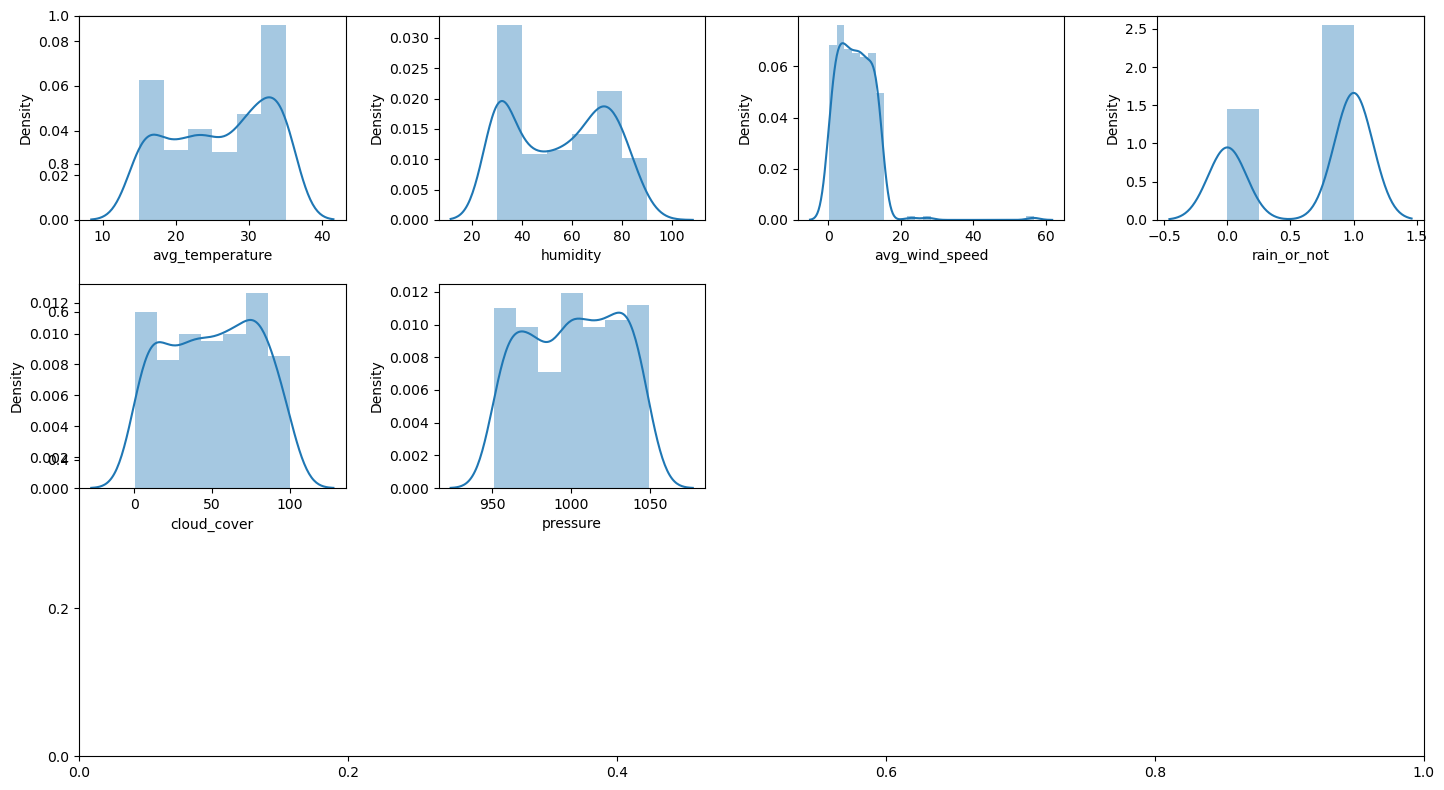

In [85]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


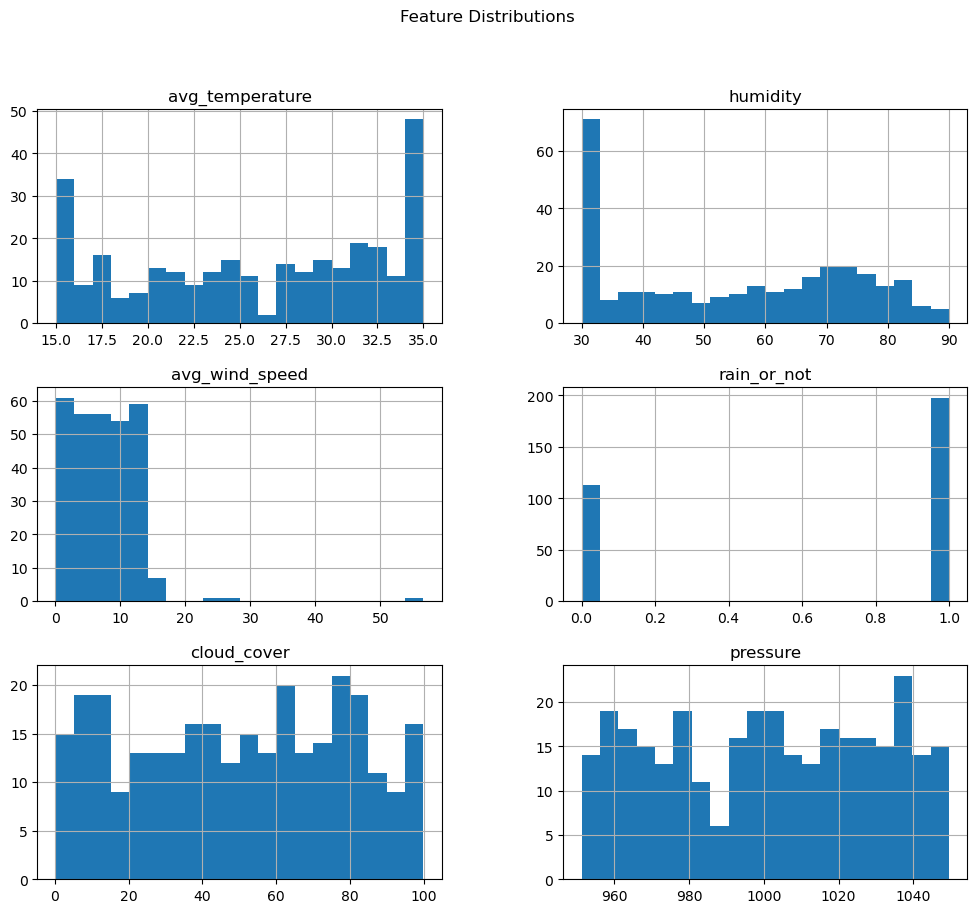

In [86]:
# Summary statistics
df.describe()

# Importing visualization libraries


# Visualizing the distribution of each feature (Histograms)
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

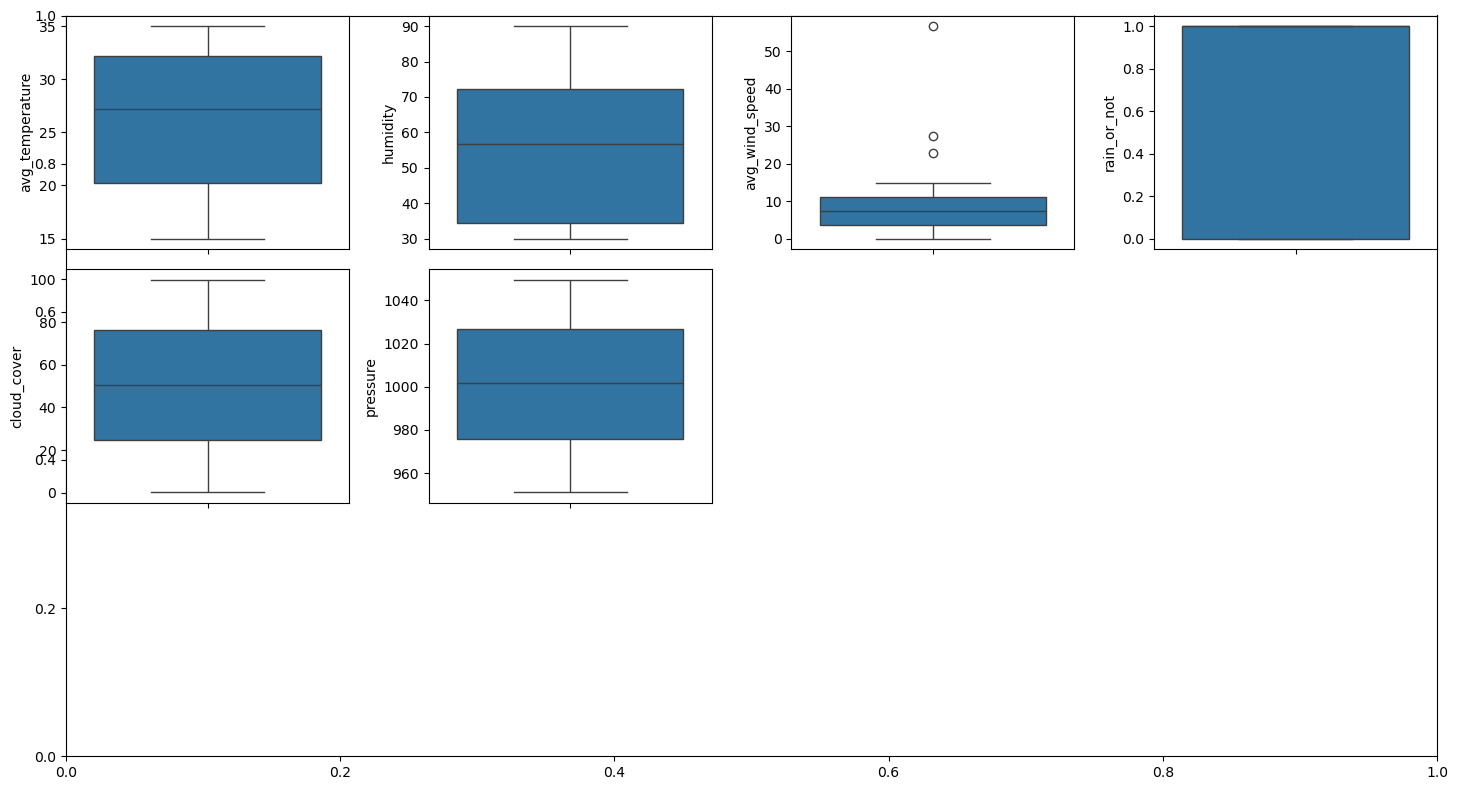

In [87]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


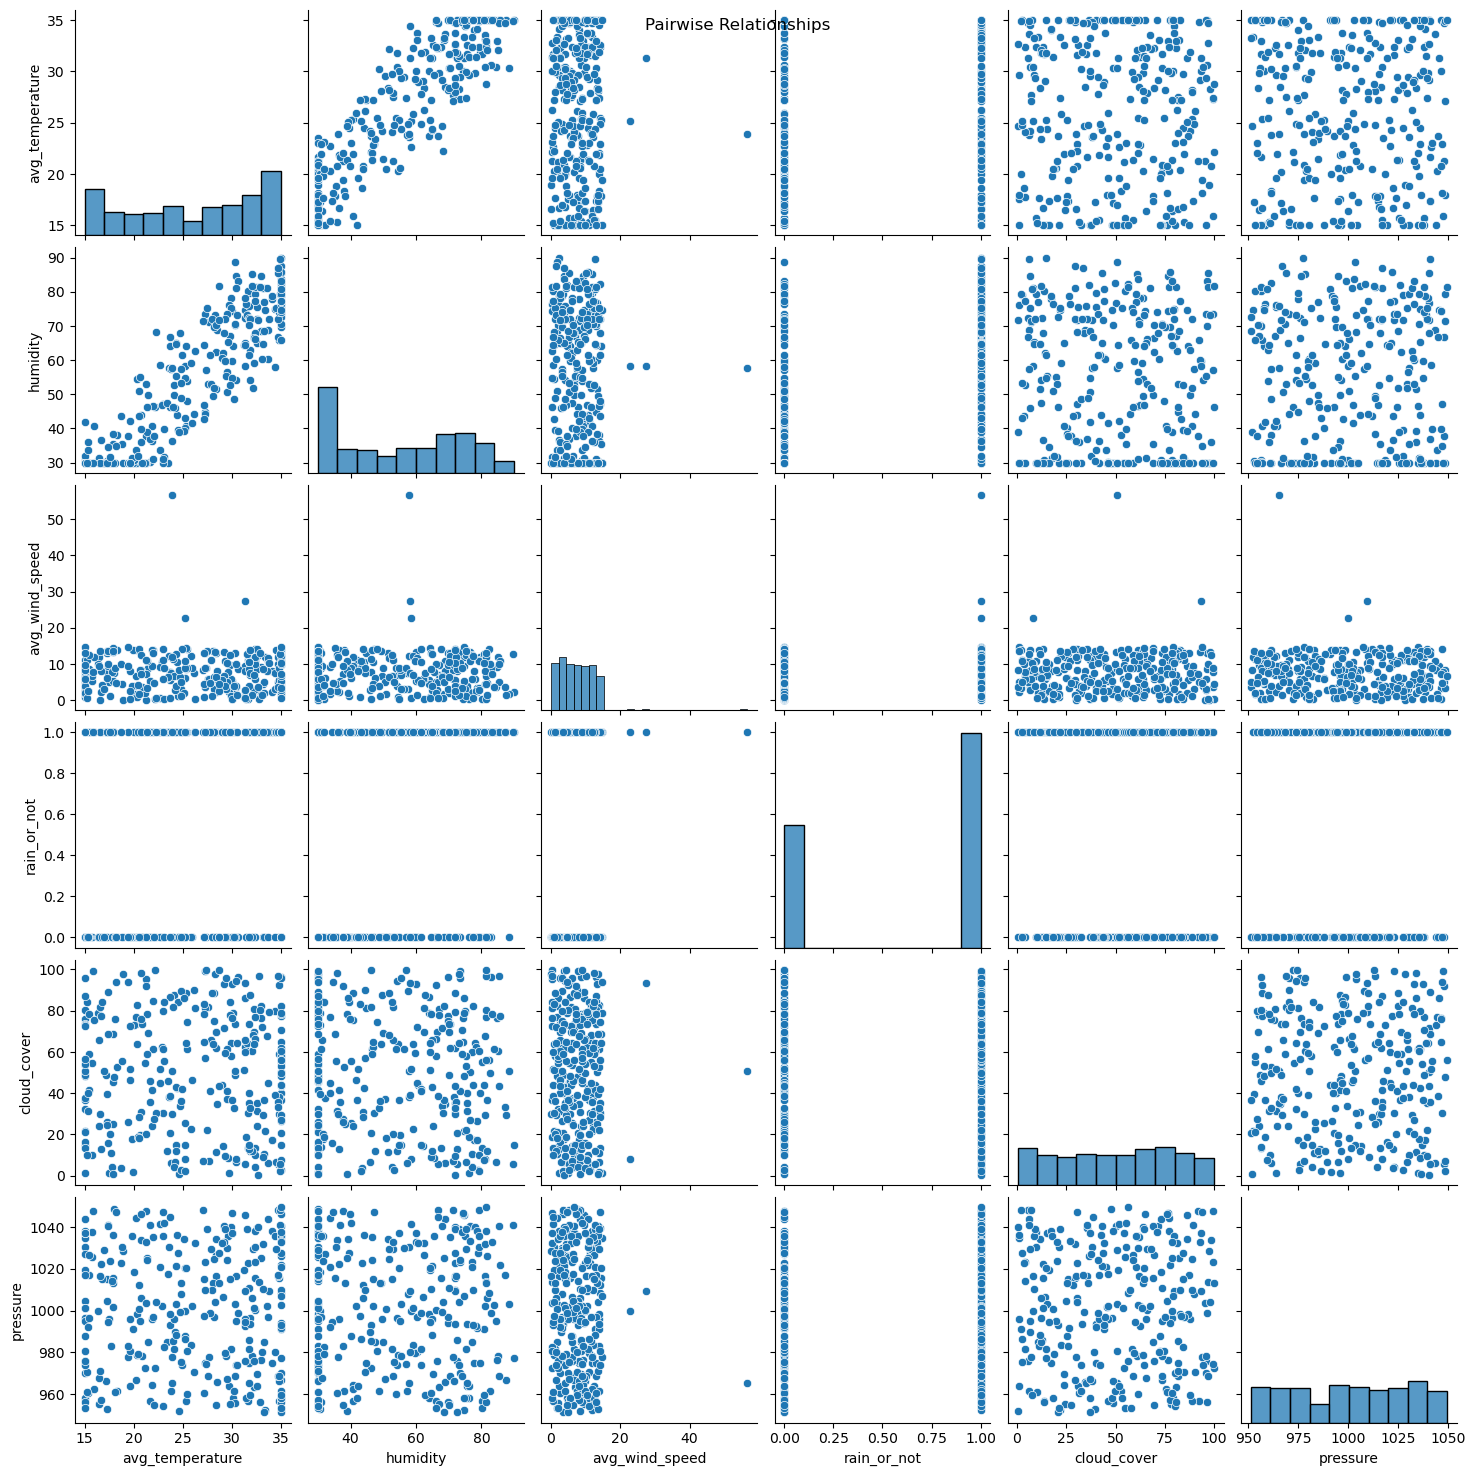

In [88]:
# Visualizing pairwise relationships
sb.pairplot(df)
plt.suptitle('Pairwise Relationships')
plt.show()


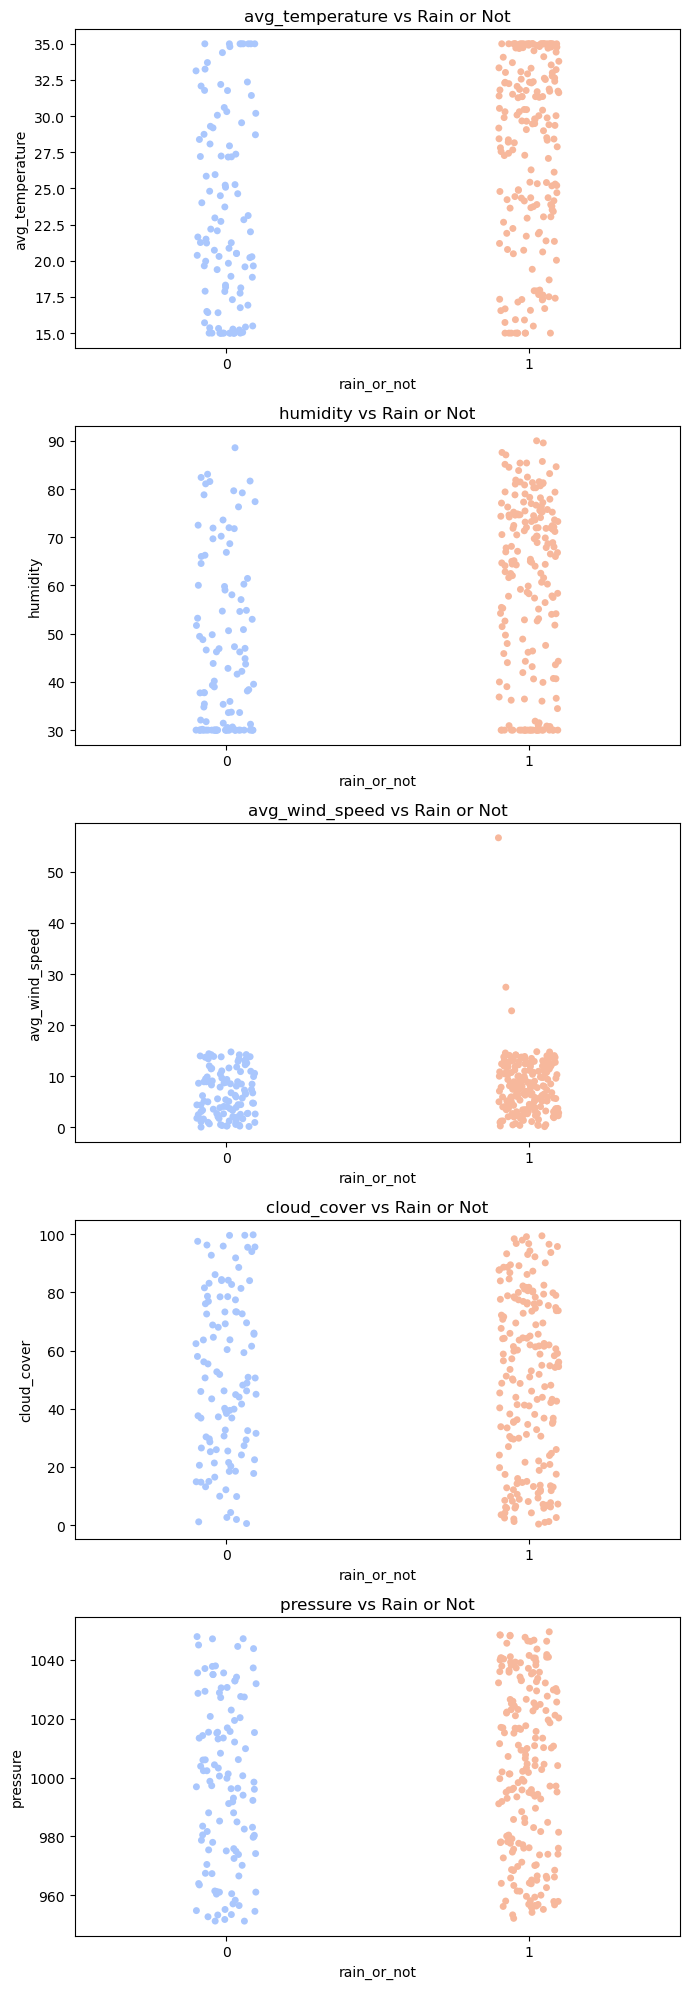

In [89]:
# List of numerical features to compare with rain_or_not
numerical_features = ["avg_temperature", "humidity", "avg_wind_speed", "cloud_cover", "pressure"]

# Create subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(7, 20))

# Plot each numerical feature against rain_or_not
for i, feature in enumerate(numerical_features):
    sb.stripplot(data=df, x="rain_or_not", y=feature, ax=axes[i], jitter=True, palette="coolwarm")
    axes[i].set_title(f"{feature} vs Rain or Not")

plt.tight_layout()
plt.show()

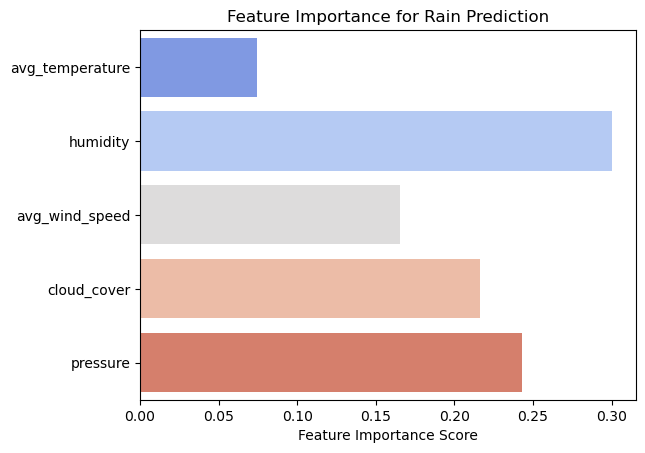

In [90]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Drop rows with missing values
df_clean = df.dropna()

# Define features and target
X = df_clean[numerical_features]
y = df_clean["rain_or_not"]

# Train a Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plot feature importance
sb.barplot(x=importances, y=numerical_features, palette="coolwarm")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance for Rain Prediction")
plt.show()


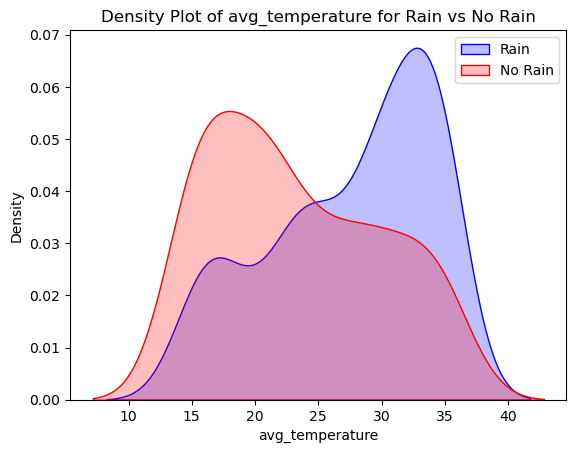

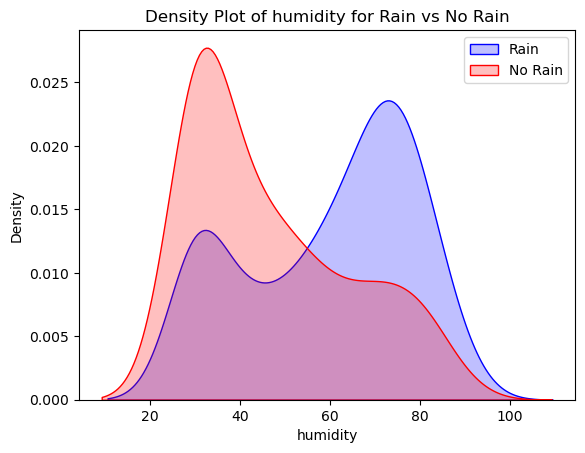

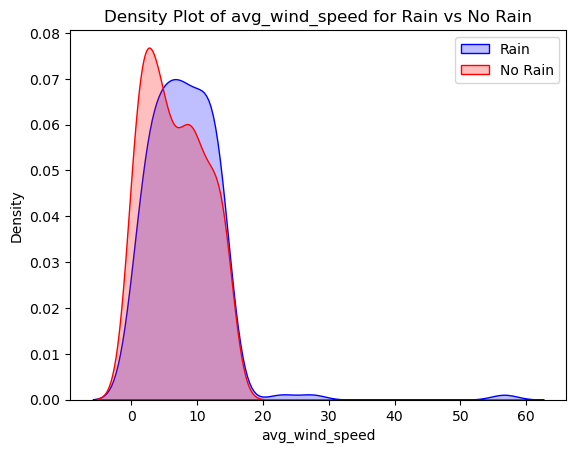

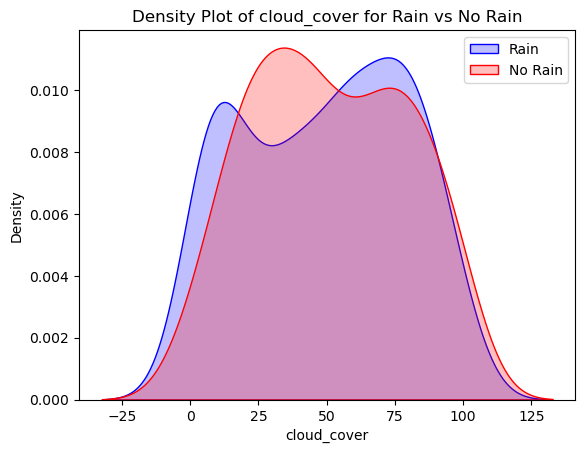

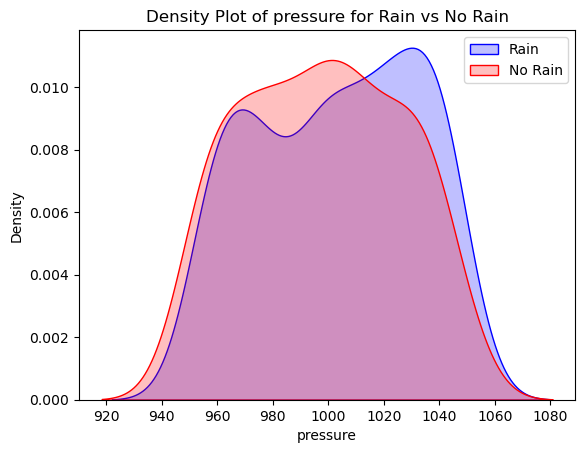

In [96]:
for feature in numerical_features:
    sb.kdeplot(df[df["rain_or_not"] == 1][feature], label="Rain", shade=True, color="blue")
    sb.kdeplot(df[df["rain_or_not"] == 0][feature], label="No Rain", shade=True, color="red")
    plt.title(f"Density Plot of {feature} for Rain vs No Rain")
    plt.legend()
    plt.show()


In [99]:
from scipy.stats import pointbiserialr

# List of numerical features
numerical_features = ["avg_temperature", "humidity", "avg_wind_speed", "cloud_cover", "pressure"]

# Drop rows with missing values in both the feature and target column
df_clean = df.dropna(subset=numerical_features + ["rain_or_not"])

# Calculate correlations
for feature in numerical_features:
    correlation, p_value = pointbiserialr(df_clean[feature], df_clean["rain_or_not"])
    print(f"{feature}: Correlation = {correlation:.3f}, p-value = {p_value:.3f}")


avg_temperature: Correlation = 0.303, p-value = 0.000
humidity: Correlation = 0.330, p-value = 0.000
avg_wind_speed: Correlation = 0.129, p-value = 0.026
cloud_cover: Correlation = -0.035, p-value = 0.548
pressure: Correlation = 0.082, p-value = 0.158


# 🔍 Based on above Results  

| Feature            | Correlation | p-value  | Interpretation |
|-------------------|-------------|----------|---------------|
| **avg_temperature** | **0.303**   | **0.000**  | Moderate positive correlation (higher temperature → more rain). Significant. |
| **humidity**       | **0.330**   | **0.000**  | Moderate positive correlation (higher humidity → more rain). Significant. |
| **avg_wind_speed** | 0.129       | 0.026    | Weak positive correlation (higher wind speed → slightly more rain). Significant. |
| **cloud_cover**    | -0.035      | 0.548    | No significant correlation (not useful for prediction). |
| **pressure**       | 0.082       | 0.158    | Weak correlation, not statistically significant. |

## 🚀 What This Means for Our Model
1. **Humidity and Temperature are Strong Predictors**  
   - Both have **moderate positive correlations** and very low p-values, making them **useful features** for predicting rain.  
2. **Wind Speed has a Weak but Significant Impact**  
   - While the correlation is weak, it is still statistically significant (p = 0.026).  
3. **Cloud Cover and Pressure Are Not Useful**  
   - Since their p-values are **too high (> 0.05)**, they do **not significantly** impact whether it rains.  

## ✅ Next Steps
- **Feature Selection:** We may consider **dropping "cloud_cover" and "pressure"** from the model since they have very weak/no correlation.  
- **Further Analysis:** Checking non-linear relationships (e.g., Decision Trees, Random Forests) to see if **interaction effects** exist.

---


## Trainining and evaluation of machine learning models

### Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("weather_data.csv")  

# Remove 'date' and 'cloud_cover' columns 
df = df.drop(['date', 'cloud_cover', 'pressure'], axis=1, errors='ignore')

# Check for missing values
df = df.dropna()

# Encode categorical column ('rain_or_not')
le = LabelEncoder()
df['rain_or_not'] = le.fit_transform(df['rain_or_not'])  # Convert to binary (0 or 1)

# Number of past days to use as features
N = 270  

# Prepare data for prediction (Use N past days to predict)
X, y = [], []
for i in range(N, len(df)):
    X.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())  # Use all other features
    y.append(df['rain_or_not'].iloc[i])  # Target label (rain or not)

X = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 🔹 Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers for logistic regression
    'max_iter': [50, 100, 200]  # Maximum iterations
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Output the best parameters
print(f"\n📌 Best Hyperparameters from Grid Search: {best_params}")

# Get predicted probabilities (for Rain)
lr_probabilities = best_classifier.predict_proba(X_test)

# Extract probabilities of Rain (class 1) from the 2nd column of the output
lr_probabilities = lr_probabilities[:, 1]  # Probabilities of class 1 (Rain)

# Get the predicted classes by thresholding the probabilities (if needed)
lr_predictions = (lr_probabilities >= 0.5).astype(int)

# Get the actual values for the last 20 days
last_20_days_actual = y[-20:]

# Generate the feature vectors for the last 20 days
last_20_days_features = []
for i in range(len(df) - 20, len(df)):
    last_20_days_features.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())

last_20_days_features = np.array(last_20_days_features)

# Get the predicted probabilities for the last 20 days
last_20_days_lr_probabilities = best_classifier.predict_proba(last_20_days_features)
last_20_days_lr_probabilities = last_20_days_lr_probabilities[:, 1]  # Probabilities for Rain (class 1)

# Get predicted classes for the last 20 days
last_20_days_lr_predictions = (last_20_days_lr_probabilities >= 0.5).astype(int)

# Calculate accuracy for the last 20 days
print(f"\n📌 Accuracy for 'rain_or_not' on the last 20 days: {accuracy_score(last_20_days_actual, last_20_days_lr_predictions):.2f}")

# Classification report for Logistic Regression
print("\n📌 Classification Report for Logistic Regression:")
print(classification_report(last_20_days_actual, last_20_days_lr_predictions))


Fitting 3 folds for each of 12 candidates, totalling 36 fits

📌 Best Hyperparameters from Grid Search: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}

📌 Accuracy for 'rain_or_not' on the last 20 days: 0.70

📌 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.67      0.91      0.77        11

    accuracy                           0.70        20
   macro avg       0.73      0.68      0.67        20
weighted avg       0.73      0.70      0.68        20



### Decision Tree 

In [112]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("weather_data.csv")  

# Remove 'date' and 'cloud_cover' columns 
df = df.drop(['date', 'cloud_cover', 'pressure'], axis=1, errors='ignore')

# Check for missing values
df = df.dropna()

# Encode categorical column ('rain_or_not')
le = LabelEncoder()
df['rain_or_not'] = le.fit_transform(df['rain_or_not'])  # Convert to binary (0 or 1)

# Number of past days to use as features
N = 270  

# Prepare data for prediction (Use N past days to predict)
X, y = [], []
for i in range(N, len(df)):
    X.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())  # Use all other features
    y.append(df['rain_or_not'].iloc[i])  # Target label (rain or not)

X = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 🔹 Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [5, 10, 15, None],  # Depth of tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Split criteria
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Output the best parameters
print(f"\n📌 Best Hyperparameters from Grid Search: {best_params}")

# Get predicted probabilities (for Rain)
dt_probabilities = best_classifier.predict_proba(X_test)

# Extract probabilities of Rain (class 1) from the 2nd column of the output
dt_probabilities = dt_probabilities[:, 1]  # Probabilities of class 1 (Rain)

# Get the predicted classes by thresholding the probabilities (if needed)
dt_predictions = (dt_probabilities >= 0.5).astype(int)

# Get the actual values for the last 20 days
last_20_days_actual = y[-20:]

# Generate the feature vectors for the last 20 days
last_20_days_features = []
for i in range(len(df) - 20, len(df)):
    last_20_days_features.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())

last_20_days_features = np.array(last_20_days_features)

# Get the predicted probabilities for the last 20 days
last_20_days_dt_probabilities = best_classifier.predict_proba(last_20_days_features)
last_20_days_dt_probabilities = last_20_days_dt_probabilities[:, 1]  # Probabilities for Rain (class 1)

# Get predicted classes for the last 20 days
last_20_days_dt_predictions = (last_20_days_dt_probabilities >= 0.5).astype(int)

# Calculate accuracy for the last 20 days
print(f"\n📌 Accuracy for 'rain_or_not' on the last 20 days: {accuracy_score(last_20_days_actual, last_20_days_dt_predictions):.2f}")

# Classification report for Decision Tree
print("\n📌 Classification Report for Decision Tree:")
print(classification_report(last_20_days_actual, last_20_days_dt_predictions))


Fitting 3 folds for each of 72 candidates, totalling 216 fits

📌 Best Hyperparameters from Grid Search: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

📌 Accuracy for 'rain_or_not' on the last 20 days: 0.75

📌 Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.69      1.00      0.81        11

    accuracy                           0.75        20
   macro avg       0.84      0.72      0.72        20
weighted avg       0.83      0.75      0.73        20



###  XG Boost

In [115]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("weather_data.csv")  

# Remove 'date' and 'cloud_cover' columns 
df = df.drop(['date', 'cloud_cover', 'pressure'], axis=1, errors='ignore')

# Check for missing values
df = df.dropna()

# Encode categorical column ('rain_or_not')
le = LabelEncoder()
df['rain_or_not'] = le.fit_transform(df['rain_or_not'])  # Convert to binary (0 or 1)

# Number of past days to use as features
N = 270  

# Prepare data for prediction (Use N past days to predict)
X, y = [], []
for i in range(N, len(df)):
    X.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())  # Use all other features
    y.append(df['rain_or_not'].iloc[i])  # Target label (rain or not)

X = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 🔹 Hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [None,5,10],  # Maximum depth of the tree
    'learning_rate': [0.01, 0.1],  # Step size shrinking to avoid overfitting
    'n_estimators': [50, 100],  # Number of boosting rounds
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples to use for each tree
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features to use for each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction to make a further partition
}

grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Output the best parameters
print(f"\n📌 Best Hyperparameters from Grid Search: {best_params}")

# Get predicted probabilities (for Rain)
xgb_probabilities = best_classifier.predict_proba(X_test)

# Extract probabilities of Rain (class 1) from the 2nd column of the output
xgb_probabilities = xgb_probabilities[:, 1]  # Probabilities of class 1 (Rain)

# Get the predicted classes by thresholding the probabilities (if needed)
xgb_predictions = (xgb_probabilities >= 0.5).astype(int)

# Get the actual values for the last 20 days
last_20_days_actual = y[-20:]

# Generate the feature vectors for the last 20 days
last_20_days_features = []
for i in range(len(df) - 20, len(df)):
    last_20_days_features.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())

last_20_days_features = np.array(last_20_days_features)

# Get the predicted probabilities for the last 20 days
last_20_days_xgb_probabilities = best_classifier.predict_proba(last_20_days_features)
last_20_days_xgb_probabilities = last_20_days_xgb_probabilities[:, 1]  # Probabilities for Rain (class 1)

# Get predicted classes for the last 20 days
last_20_days_xgb_predictions = (last_20_days_xgb_probabilities >= 0.5).astype(int)

# Calculate accuracy for the last 20 days
print(f"\n📌 Accuracy for 'rain_or_not' on the last 20 days: {accuracy_score(last_20_days_actual, last_20_days_xgb_predictions):.2f}")

# Classification report for XGBoost
print("\n📌 Classification Report for XGBoost:")
print(classification_report(last_20_days_actual, last_20_days_xgb_predictions))


Fitting 3 folds for each of 324 candidates, totalling 972 fits

📌 Best Hyperparameters from Grid Search: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 50, 'subsample': 0.7}

📌 Accuracy for 'rain_or_not' on the last 20 days: 0.55

📌 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



### Random Forest

In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("weather_data.csv")  

# Remove 'date' and 'cloud_cover' columns 
df = df.drop(['date', 'cloud_cover','pressure`'], axis=1, errors='ignore')

# Check for missing values
df = df.dropna()

# Encode categorical column ('rain_or_not')
le = LabelEncoder()
df['rain_or_not'] = le.fit_transform(df['rain_or_not'])  # Convert to binary (0 or 1)

# Number of past days to use as features
N = 270  

# 🔹 Predicting 'rain_or_not' using RandomForestClassifier

X, y = [], []
for i in range(N, len(df)):
    X.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())  # Use all other features
    y.append(df['rain_or_not'].iloc[i])  # Target label (rain or not)

X = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 🔹 Hyperparameter tuning for classification
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2] , # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Split criteria
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Output the best parameters
print(f"\n📌 Best Hyperparameters from Grid Search: {best_params}")

# Get predicted probabilities (for Rain)
rain_probabilities = best_classifier.predict_proba(X_test)

# Extract probabilities of Rain (class 1) from the 2nd column of the output
rain_probabilities = rain_probabilities[:, 1]  # Probabilities of class 1 (Rain)

# Get the predicted classes by thresholding the probabilities (if needed)
predicted_classes = (rain_probabilities >= 0.5).astype(int)

# Output classification performance for the last 20 days
print("\n🔹 Classification Performance Metrics for the last 20 days:")

# Get the classification performance metrics on the last 20 days
last_20_days_actual = y[-20:]

last_20_days_features = []
for i in range(len(df) - 20, len(df)):
    last_20_days_features.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())

last_20_days_features = np.array(last_20_days_features)

# Get probabilities for the last 20 days
last_20_days_probabilities = best_classifier.predict_proba(last_20_days_features)
last_20_days_probabilities = last_20_days_probabilities[:, 1]  # Probabilities for Rain (class 1)

# Get predicted classes for the last 20 days
last_20_days_predictions = (last_20_days_probabilities >= 0.5).astype(int)

# Calculate accuracy for the last 20 days
last_20_days_accuracy = accuracy_score(last_20_days_actual, last_20_days_predictions)
print(f"\n📌 Accuracy for 'rain_or_not' on the last 20 days: {last_20_days_accuracy:.2f}")


# Classification report for the last 20 days
print("\n📌 Classification Report for 'rain_or_not' on the last 20 days:")
print(classification_report(last_20_days_actual, last_20_days_predictions))


Fitting 3 folds for each of 48 candidates, totalling 144 fits

📌 Best Hyperparameters from Grid Search: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

🔹 Classification Performance Metrics for the last 20 days:

📌 Accuracy for 'rain_or_not' on the last 20 days: 0.80

📌 Classification Report for 'rain_or_not' on the last 20 days:
              precision    recall  f1-score   support

           0       1.00      0.56      0.71         9
           1       0.73      1.00      0.85        11

    accuracy                           0.80        20
   macro avg       0.87      0.78      0.78        20
weighted avg       0.85      0.80      0.79        20



Based on above results best model is random forest classification


# Weather Prediction Using Random Forest Classifier

## Steps

1. **Load and Preprocess Data:**
   - Load the weather data from a CSV file.
   - Drop unnecessary columns (`date`, `cloud_cover`, and `pressure`).
   - Remove rows with missing values.

2. **Label Encoding:**
   - Convert the target variable (`rain_or_not`) into binary values (0 for 'No Rain', 1 for 'Rain') using `LabelEncoder`.

3. **Feature Creation:**
   - Use the past 270 days of data to predict the weather on the next day (N+1).
   - Create feature vectors by flattening the data from the previous 270 days.
   - Set the target label (`y`) as the `rain_or_not` value for the N+1th day.

4. **Split the Data:**
   - Split the data into training, validation, and test sets.
   - Use 70% of the data for training and 30% for testing (further split into validation and test sets).

5. **Hyperparameter Tuning:**
   - Use `GridSearchCV` to tune the hyperparameters of the `RandomForestClassifier`.
   - Search over different values of `n_estimators`, `max_depth`, and `min_samples_split` to find the best model.

6. **Train the Model:**
   - Train the model using the best hyperparameters selected from the grid search.

7. **Make Predictions:**
   - Use the trained model to predict rain probabilities for the test set.
   - Extract the probability of class 1 (Rain) from the model output.
   - Apply a threshold of 0.5 to classify the predictions into 'Rain' (1) or 'No Rain' (0).

8. **Evaluate Performance on the Last 20 Days:**
   - Generate features for the last 20 days using the same approach (past 270 days of data).
   - Predict whether it will rain on those 20 days and compare predictions with the actual values.
   - Calculate accuracy for the last 20 days.
   - Print predictions, actual values, and probabilities for each of the last 20 days.

9. **Generate a Classification Report:**
   - Print a detailed classification report for the last 20 days, showing precision, recall, F1-score, and support for both 'Rain' and 'No Rain'.


In [117]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("weather_data.csv")  

# Remove 'date' and 'cloud_cover' columns 
df = df.drop(['date', 'cloud_cover','pressure`'], axis=1, errors='ignore')

# Check for missing values
df = df.dropna()

# Encode categorical column ('rain_or_not')
le = LabelEncoder()
df['rain_or_not'] = le.fit_transform(df['rain_or_not'])  # Convert to binary (0 or 1)

# Number of past days to use as features
N = 270  

# 🔹 Predicting 'rain_or_not' using RandomForestClassifier

X, y = [], []
for i in range(N, len(df)):
    X.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())  # Use all other features
    y.append(df['rain_or_not'].iloc[i])  # Target label (rain or not)

X = np.array(X)
y = np.array(y)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# 🔹 Hyperparameter tuning for classification
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2] , # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Split criteria
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Output the best parameters
print(f"\n📌 Best Hyperparameters from Grid Search: {best_params}")

# Get predicted probabilities (for Rain)
rain_probabilities = best_classifier.predict_proba(X_test)

# Extract probabilities of Rain (class 1) from the 2nd column of the output
rain_probabilities = rain_probabilities[:, 1]  # Probabilities of class 1 (Rain)

# Get the predicted classes by thresholding the probabilities (if needed)
predicted_classes = (rain_probabilities >= 0.5).astype(int)

# Output classification performance for the last 20 days
print("\n🔹 Classification Performance Metrics for the last 20 days:")

# Get the classification performance metrics on the last 20 days
last_20_days_actual = y[-20:]

last_20_days_features = []
for i in range(len(df) - 20, len(df)):
    last_20_days_features.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())

last_20_days_features = np.array(last_20_days_features)

# Get probabilities for the last 20 days
last_20_days_probabilities = best_classifier.predict_proba(last_20_days_features)
last_20_days_probabilities = last_20_days_probabilities[:, 1]  # Probabilities for Rain (class 1)

# Get predicted classes for the last 20 days
last_20_days_predictions = (last_20_days_probabilities >= 0.5).astype(int)

# Calculate accuracy for the last 20 days
last_20_days_accuracy = accuracy_score(last_20_days_actual, last_20_days_predictions)
print(f"\n📌 Accuracy for 'rain_or_not' on the last 20 days: {last_20_days_accuracy:.2f}")

# Print predicted probabilities and final classification for the last 20 days
print("\n📌 Predictions for 'rain_or_not' on the last 20 days:")

for i in range(len(last_20_days_predictions)):
    predicted_class = 'Rain' if last_20_days_predictions[i] == 1 else 'No Rain'
    print(f"  Day {len(df)-20 + i}: Predicted Probability = {last_20_days_probabilities[i]:.2f} | Predicted Class = {predicted_class} | Actual = {'Rain' if last_20_days_actual[i] == 1 else 'No Rain'}")

# Classification report for the last 20 days
print("\n📌 Classification Report for 'rain_or_not' on the last 20 days:")
print(classification_report(last_20_days_actual, last_20_days_predictions))


Fitting 3 folds for each of 48 candidates, totalling 144 fits

📌 Best Hyperparameters from Grid Search: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

🔹 Classification Performance Metrics for the last 20 days:

📌 Accuracy for 'rain_or_not' on the last 20 days: 0.80

📌 Predictions for 'rain_or_not' on the last 20 days:
  Day 276: Predicted Probability = 0.80 | Predicted Class = Rain | Actual = Rain
  Day 277: Predicted Probability = 0.94 | Predicted Class = Rain | Actual = Rain
  Day 278: Predicted Probability = 0.88 | Predicted Class = Rain | Actual = Rain
  Day 279: Predicted Probability = 0.24 | Predicted Class = No Rain | Actual = No Rain
  Day 280: Predicted Probability = 0.90 | Predicted Class = Rain | Actual = Rain
  Day 281: Predicted Probability = 0.88 | Predicted Class = Rain | Actual = Rain
  Day 282: Predicted Probability = 0.88 | Predicted Class = Rain | Actual = Rain
  Day 283: Predicted Probability = 0.24 | Pre

## Let's Predict the Future!

Now that we have successfully preprocessed the data, performed exploratory data analysis (EDA), and trained several machine learning models, it's time to make predictions for the future!

### Training the Model on All Data

To predict the rain probabilities for the next 21 days, we will train the model using all the available historical weather data. This allows the model to learn from the entire dataset, improving its ability to generalize and make more accurate predictions.

### Predicting Rain for the Next 21 Days

Once the model is trained, we will use it to predict the probability of rain for the upcoming 21 days. The model will output the probability of rain for each of these days, helping farmers plan their irrigation, planting, and harvesting activities accordingly.

By leveraging machine learning, this system can provide more accurate predictions than traditional weather forecasting, especially for localized conditions that are crucial in agriculture.

Stay tuned as we move forward with training and predicting future weather!


In [121]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("weather_data.csv")  # Replace with your actual dataset path

# Remove 'date' and 'cloud_cover' columns if they exist
df = df.drop(['date', 'cloud_cover'], axis=1, errors='ignore')

# Encode categorical column ('rain_or_not') if not already encoded
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0})  # Convert to binary (1 or 0)

# Handle missing values: Remove rows with NaN in target columns
df = df.dropna(subset=['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure', 'rain_or_not'])

# Define parameters for regressor and classifier
best_regressor_params = {
    'n_estimators': 50,  # Number of trees in the forest
    'max_depth': None,  # Maximum depth of the trees
    'min_samples_split':2,  # Minimum samples required to split a node
    'min_samples_leaf': 1 , # Minimum samples required to be at a leaf node
    'criterion': 'gini' # Split criteria
}


best_classifier_params = {
    'n_estimators': 50,  # Number of trees in the forest
    'max_depth': None,  # Maximum depth of the trees
    'min_samples_split':2,  # Minimum samples required to split a node
    'min_samples_leaf': 1 , # Minimum samples required to be at a leaf node
    'criterion': 'gini' # Split criteria
}

# Set N to the number of rows in the dataset
N = 21  # Set N as 21 for predicting the next 21 days

# 🔹 Predicting numerical values using RandomForestRegressor
for target_col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'pressure']:  # Use actual columns
    # Create feature set (X) and target set (y)
    X, y = [], []
    
    # Correct the loop range to properly iterate over the dataset
    for i in range(N, len(df)):  # Ensure starting index allows enough data for N previous days
        X.append(df[target_col].iloc[i-N:i].values)  # Use previous N days of the target column
        y.append(df[target_col].iloc[i])  # Target value for prediction

    X = np.array(X)
    y = np.array(y)

    # Check if X or y are empty
    if X.shape[0] == 0:
        continue

    # Reshape X if necessary for sklearn
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Train the model using the regressor parameters
    model = RandomForestRegressor(
        n_estimators=best_regressor_params['n_estimators'],
        max_depth=best_regressor_params['max_depth'],
        min_samples_split=best_regressor_params['min_samples_split'],
        random_state=42
    )
    model.fit(X, y)  # Fit the model to the full data

    # Store predictions for the next 21 days
    future_predictions = model.predict(X[-21:])  # Predict for the next 21 days

    # Output future predictions for the next 21 days
  #  print(f"\n📌 Future Predictions for {target_col} for the next 21 days:")
  #  for i in range(21):  # Print the next 21 days predictions
  #      print(f"  Day {len(df) + i + 1}: Predicted = {future_predictions[i]:.2f}")


# 🔹 Predicting 'rain_or_not' using RandomForestClassifier (for classification)
print("\n🔹 Training model to predict 'rain_or_not'...")

X, y = [], []
for i in range(N, len(df)):  # Ensure proper range for feature set
    X.append(df.drop(columns=['rain_or_not']).iloc[i-N:i].values.flatten())  # Use all other features
    y.append(df['rain_or_not'].iloc[i])  # Target label (rain or not)

X = np.array(X)
y = np.array(y)

# Check if X or y are empty
if X.shape[0] == 0:
    print("Error: X array is empty for rain_or_not")
else:
    # Reshape X to be 2D for the classifier
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Train the model using the corrected classifier parameters
    classifier = RandomForestClassifier(
        n_estimators=best_classifier_params['n_estimators'],
        max_depth=best_classifier_params['max_depth'],
        min_samples_split=best_classifier_params['min_samples_split'],
        random_state=42
    )
    classifier.fit(X, y)  # Fit the classifier to the full data

    # Store predictions for the next 21 days
    rain_predictions = classifier.predict(X[-21:])  # Predict for the next 21 days
    rain_probabilities = classifier.predict_proba(X[-21:])[:, 1]  # Get probability for class "Rain"

    # Output predictions for the next 21 days (only for rain-related predictions)
    print("\n📌 Future Predictions for 'rain_or_not' for the next 21 days:")
    for i in range(21):  # Print the next 21 days predictions
        print(f"  Day {len(df) + i + 1}: Predicted Probability = {rain_probabilities[i]:.2f} | Predicted Class = {'Rain' if rain_predictions[i] == 1 else 'No Rain'}")



🔹 Training model to predict 'rain_or_not'...

📌 Future Predictions for 'rain_or_not' for the next 21 days:
  Day 297: Predicted Probability = 0.92 | Predicted Class = Rain
  Day 298: Predicted Probability = 0.94 | Predicted Class = Rain
  Day 299: Predicted Probability = 0.94 | Predicted Class = Rain
  Day 300: Predicted Probability = 0.90 | Predicted Class = Rain
  Day 301: Predicted Probability = 0.24 | Predicted Class = No Rain
  Day 302: Predicted Probability = 0.82 | Predicted Class = Rain
  Day 303: Predicted Probability = 0.78 | Predicted Class = Rain
  Day 304: Predicted Probability = 0.90 | Predicted Class = Rain
  Day 305: Predicted Probability = 0.20 | Predicted Class = No Rain
  Day 306: Predicted Probability = 0.90 | Predicted Class = Rain
  Day 307: Predicted Probability = 0.90 | Predicted Class = Rain
  Day 308: Predicted Probability = 0.20 | Predicted Class = No Rain
  Day 309: Predicted Probability = 0.82 | Predicted Class = Rain
  Day 310: Predicted Probability = 0.1